# HW 3: Maximum Likelihood Estimation Error Estimation

## Review MAP decision rule

In the following we wish to find the decision boundary for classifying the *realization* of random vector $X$, denoted $\vec{x}$. The notation is given in the following.

The support for the prior is the set $\{ \omega_1, \omega_2 \}$, and the *prior probability mass function* is given by:

$$
P(\omega)=\begin{cases}
p_0~~ if~~ \omega=\omega_0 \\
p_1~~ if~~  \omega=\omega_1
\end{cases}
$$

The likelihood of $\omega$ with respect to feature vector of length $d$, $\vec{x}$ is given by

$$
p(\vec{x} | \omega_i ) = \frac{1}{\sqrt{(2 \pi )^d \det(\Sigma_i)} }
e^{-\frac{1}{2}(\vec{x}-\mu_i)^T\Sigma_i^{-1}(\vec{x}-\mu_i)}
$$
In our case, we will assume that $d=2$, and so the feature vector is
$$
\vec{x} =
  \begin{bmatrix} x \\y
  \end{bmatrix}
$$
and
$$
\begin{align}
\vec{\mu}_i & = E_{\vec{x} | \omega_i }[~\vec{x}~] \\
            & = \begin{bmatrix}
                E_{x | \omega_i }[~x~] \\
                E_{y | \omega_i }[~y~]
              \end{bmatrix}\\
            & = \begin{bmatrix}
                \mu_{x_{i}} \\
                \mu_{y_{i}}
              \end{bmatrix}
\end{align}
$$

For this project, we consider only a diagonal $d \times d$ covariance matrix (so, we can say that $x$ and $y$ are independent):

$$
\begin{align}
\Sigma_i &= E_{\vec{x}|\omega_i}[(\vec{x}-\vec{\mu}_i)\cdot (\vec{x}-\vec{\mu}_i)^T] \\
         & = \begin{bmatrix}
       E_{\vec{x}|\omega_i} (x -\mu_{x_{i}})^2  &
      E_{\vec{x}|\omega_i} (x -\mu_{x_{i}})(y -\mu_{y_{i}})  \\
       E_{\vec{x}|\omega_i} (x -\mu_{x_{i}})(y -\mu_{y_{i}}) &
       E_{\vec{x}|\omega_i} (y -\mu_{y_{i}})^2
             \end{bmatrix} \\
        & = \begin{bmatrix}
              \sigma_{11,i}^2  &
              0  \\
              0 &
              \sigma_{22,i}^2
             \end{bmatrix}
\end{align}
$$

This simplifies the determinant to $|\Sigma_i|=\sigma_{11,i}^2 \sigma_{22,i}^2-0\cdot0 $

If we use Maximum a posteriori (MAP) decision rule, then we have our "sun" rule:

$$
P(\omega_0 |\vec{x}) \underset{decide~\omega_1}{\overset{decide~\omega_0}{\gtrless}} P(\omega_1 |\vec{x})
$$
or equivalently our "smiling sun" rule
$$
P(\omega_0)\cdot p(\vec{x}|\omega_0) \underset{decide~\omega_1}{\overset{decide~\omega_0}{\gtrless}}  P(\omega_1) \cdot p(\vec{x}|\omega_1)
$$

As we discussed in the class, when we employ uniform priors, such that $p_0=p_1=1/2$, then the classification/estimation becomes a maximum likelihood estimation (ML). In other words, we have the following decision rule, which minimizes the probability of error:

$$
p(\vec{x}|\omega_0) \cdot \frac{1}{2}~~~ \underset{decide~\omega_1}{\overset{decide~\omega_0}{\gtrless}} ~~~p(\vec{x}|\omega_1)\cdot \frac{1}{2}~~~~(\bigstar),
$$ which is the same as:
$$
p(\vec{x}|\omega_0) ~ \underset{decide~\omega_1}{\overset{decide~\omega_0}{\gtrless}} ~p(\vec{x}|\omega_1) ~~~~~ (†)
$$


***

## Review of the discriminant function

REMINDER: we only care about $ω_i$ and *NOT* what the actual value of the maximum (so, we use argmax, not max), so any monotonically increasing function applied to a discriminant function is also a useful discriminant function.
In this case, we use the natural log to make a better (more expedient) discriminant function:


So, applying this modification to ($†$), we get a new discriminant function, $g_i(\vec{x})=ln \left( p(\vec{x} | \omega_i) \right)$, and the decision rule becomes

$$
ln \left(p(\vec{x}|\omega_1) \right)~ \underset{decide~\omega_2}{\overset{decide~\omega_1}{\gtrless}} ~ln \left( p(\vec{x}|\omega_2) \right)
$$

This allows us to simplify the Gaussian pdf to a more maneagable form from the cumbersome

$$
p(\vec{x} | \omega_i) = \frac{1}{\sqrt{(2 \pi )^d \det(\Sigma_i)} }
e^{\frac{-1}{2}(\vec{x}-\mu_i)^T\Sigma_i^{-1}(\vec{x}-\mu_i)}
$$

where $d=2$ and the diagonal $\Sigma_i$ has deteminant equal to $\sigma^2_{11,i} \cdot \sigma^2_{22,i}$ ; the log function allows us to separate the terms for later simplification

$$
\ln \left(p(\vec{x} | \omega_i) \right) = -\ln(2\pi) - \ln(\sigma_{11,i} \cdot \sigma_{22,i})
-\frac{1}{2} (\vec{x}-\mu_i)^T\Sigma_i^{-1}(\vec{x}-\mu_i)
$$

We further assume that $\sigma_{11,i} = \sigma_{22,i}$, so we can simplify its notation to $\sigma_i$; this allows us to simplify the function to
$$
\ln \left(p(\vec{x} | \omega_i) \right) = -\ln(2\pi) - \ln(\sigma^2_{i} )
-\frac{1}{2} (\vec{x}-\mu_i)^T\Sigma_i^{-1}(\vec{x}-\mu_i)
$$
Another thing that becomes easier is the term:
$$
-\frac{1}{2} (\vec{x}-\mu_i)^T\Sigma_i^{-1}(\vec{x}-\mu_i)=
-\frac{1}{2} (\vec{x}-\mu_i)^T
\begin{bmatrix}
              \sigma_{11,i}^2  &
              0  \\
              0 &
              \sigma_{22,i}^2
             \end{bmatrix}^{-1}
 (\vec{x}-\mu_i) \\
 = -\frac{1}{2} (\vec{x}-\mu_i)^T
 \frac{1}{|\Sigma_i|}
\begin{bmatrix}
              \sigma_{i}^2  &
              -0  \\
              -0 &
              \sigma_{i}^2
             \end{bmatrix}
 (\vec{x}-\mu_i) \\
  = -\frac{1}{2\sigma_{i}^2} (\vec{x}-\mu_i)^T
\begin{bmatrix}
              1  &
              0  \\
              0 &
              1
             \end{bmatrix}
 (\vec{x}-\mu_i) \\
  = -\frac{1}{2\sigma_{i}^2} (\vec{x}-\mu_i)^T
 (\vec{x}-\mu_i) \\
   = -\frac{1}{2\sigma_{i}^2} ||(\vec{x}-\mu_i) ||^2
$$
This allows us to compare:
$$
-\ln(2\pi) - \ln(\sigma^2_{0} )
-\frac{1}{2\sigma_{0}^2} ||(\vec{x}-\mu_0) ||^2~ \underset{decide~\omega_1}{\overset{decide~\omega_0}{\gtrless}} -\ln(2\pi) - \ln(\sigma^2_{1} )
-\frac{1}{2\sigma_{1}^2} ||(\vec{x}-\mu_1) ||^2
$$ which simplifies the decision to:
$$
- \ln(\sigma^2_{0} )
-\frac{1}{2\sigma_{0}^2} ||(\vec{x}-\mu_0) ||^2~ \underset{decide~\omega_1}{\overset{decide~\omega_0}{\gtrless}} - \ln(\sigma^2_{1} )
-\frac{1}{2\sigma_{1}^2} ||(\vec{x}-\mu_1) ||^2 ~~~~~~(‡)
$$
***

### Different Cases We Look At
In the following program, most of the code is written for you, you just need to understand and use it. Look at the decision boundary. Does it make sense? Play with different values to get a sense of the estimator.

We study the following cases:

1.   Where $p_0=p_1=1/2$
2.   Where $p_0 \neq p_1$
3.   Where $\Sigma_0 = \Sigma_1$
4.   Where $\Sigma_0 \neq \Sigma_1$
5.   Deterministic $\mu_X$
6.   Probabilistic $\mu_X$

In all examples we only consider $\Sigma_i$ to be a diagonal matrix (which means that the features are independent).



### Explanation for ML estimator

In this project we aim to calculate the probability of error for maximum likelihood and MAP estimator.

First, let's prepare some of the code for your project for the case of a uniform prior distribution. That is to say, we look at case 1 from the list above.

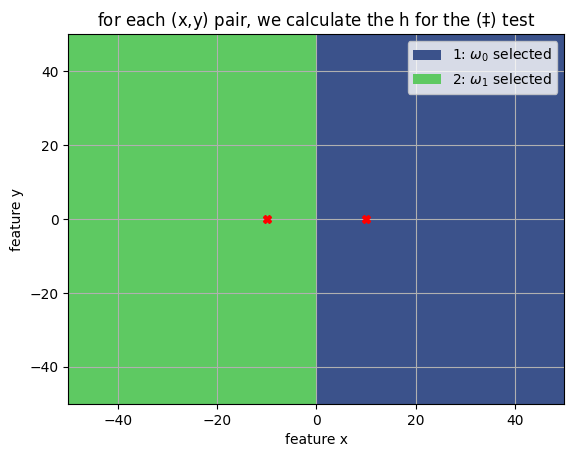

In [ ]:

import numpy as np                   # this command imports the numpy (numerical Python) library, and gives it the nickname "np"
import matplotlib.pyplot as plt      # this command imports the matplotlib plotting library, and gives it the nickname "plt"

# We will define the covariance matrix and mean for a 2-dimensional feature space.
# This makes a classification problem with N labels, and instances with 2 features.
# Since we have only two features in this project, we call the individual features x and y. We could
# alternatively make these two features part of a vector but at this stage in the course
# we don't use then in a vector. If you are comfortable doing so please go ahead and define
# the vector of features.
# As for the covariance matrix, we define them as matrices. Please remember that the matrix
# is diagonal (off diaginal elements are zero) which means the the features are independent.
# We do not make any assumptions on the diagonal elements. They can be different in the general case.
####################################################################################################

# In this project we only focus on N=2 hypothesis, w_0 and w_1 *********************************************************
N = 2                                # number of hypothesis, or individual 2D Gaussian Distributions. Here w_0 and w_1

# We'll set up a control, so we can choose how to set the means, mu_x,i and mu_y,i for each hypothesis i****************
dist_with_random_mean = 0            # if this equals 1, then the mean, mu, is chosen randomly (case 6 from the above list)
                                     # if it's not equal to one, then the mean is given by a specific vector, seen below (case 5 from the above list)

if dist_with_random_mean:            # this control sequence gets triggered if dist_with_random_mean=1
  mu_X_boundary = 20.                # this defines boundary for the means, as the pdf is uniform over the interval [-mu_X_boundary, mu_X_boundary)
  mu_Y_boundary = 20.                # this does the same for the y's mean

  Mu_x = np.random.uniform(-mu_X_boundary, mu_X_boundary, N) # this command uses the random library to create an length-N vector of numbers generated by uniform pdf
                                                             # the pdf is uniform over the interval [-mu_X_boundary, mu_X_boundary)
  Mu_y = np.random.uniform(-mu_Y_boundary, mu_Y_boundary, N) # this does the same for feature y
else:                                # this control sequence gets triggered if dist_with_random_mean is equal to 0
                                     # This else part creates means that are rqually distributed on a circle for N labels.
                                     # In this problem we are only interested in the two means located at (10, 0) and (-10, 0)
  theta = np.linspace( 0,2*np.pi, N, endpoint = False)
  Mu_x = 10 * np.cos(theta)          # this creates a 1xN vector for the means of x
  Mu_y = 10 * np.sin(theta)          # this creates a 1xN vector for the means of y

# In this section we manually select all covarinace matrices to be equal
# (Case 3 from the list above) we set all diagonal elements to be 1 ****************************************************
Sigma = np.empty(N, dtype ='object') # this command reserves N spaces in memory for N Covariance matricies
for i in np.arange(N):               # for each hypothesis (w_0 and w_1)
  Sigma[i] = np.diag(np.ones(N))     # assign a Sigma matrix that is diagonal with ones along the diagonal

# We define the graph area and number of grid points for the graph *****************************************************
N_grid = 1000                       # these mark the number of grid points on the horizontal and vertical axis
X_boundary = 50.                    # the graph will go horizontally from -50 to 50
Y_boundary = 50.                    # the graph will go vertically from -50 to 50
x = np.linspace(-X_boundary,X_boundary,N_grid)   # this command uses the numpy library to create the 1000, equally spaced points for our graph's horizontal axis
y = np.linspace(-Y_boundary,Y_boundary,N_grid)   # this command uses the numpy library to create the 1000, equally spaced points for our graph's vertical axis

# This next part of the code will take every feature pair, \vector{x}=(x,y), and apply the discriminant function
# to it for all N (here N=2) conditional pdf. It then makes the "double dagger" (for binary) comparison from above and
# sets h(x,y) to the label, i, with the biggest discriminant. **********************************************************
h=np.zeros([len(x), len(y)])       # this initializes h to 1000x1000 matrix of zeros for every (x,y) feature vector
for k in np.arange(len(x)):        # this loop sets dummy variable k to the set created by the numpy library to create equally spaced numbers within the interval [0, length of vector x)
  for j in np.arange(len(y)):      # this loop sets dummy variable j to the set created by the numpy library to create equally spaced numbers within the interval [0, length of vector y)
    max = -1e20                    # initialize max to a very negative number
    for i in np.arange(N):         # this loop sets dummy variable n first to 0 (for w_0) and then to 1 (for w_1) for the binary case
      # Note that Sigma[n][0,0] is the element (0,0) of the covariance matrix for label n. In above simplificatin this is equivalent to using sigma_0
      # this follows the equations above. Please convince yourself that the following is correct
      discriminant = - np.log(Sigma[i][0,0]) - ( 1/(2*Sigma[i][0,0]) )*(np.square(x[k] - Mu_x[i]) + np.square(y[j]-Mu_y[i]))  # this is the discriminant function, g_i(x,y), of double dagger
      if discriminant > max:       # if the current g_i(x,y,) is the largest so far, we'll set h(x,y) to its label, and set max to its value for the next i's comparison
        max = discriminant         # This sets the comaprison threshold for the next i
        h[j,k] = i+1               # This sets h(x,y) to i's label

# This final segment of code is for graphing **************************************************************************
LL = [i for i in range(N+1)]
cs = plt.contourf(x, y,h, levels=LL)  # this command uses the numpy, Matplotlib.pyplot library to make a contour plot and fill the contours with color
                                      # x is the horizontal parameter and y is the vertical parameter in the graph. They are the two features, and h is the height.
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0])
    for pc in cs.collections]
leg = []
for i in np.arange(N):
  temp = ', '
  leg.append(', ')
legend_labels = [f"{i + 1}: $\omega_{i}$ selected" for i in range(N)] # this line jus generate an array that can be used in creating the legend
plt.legend(proxy,legend_labels)
plt.xlabel('feature x')
plt.ylabel('feature y')
plt.title('for each (x,y) pair, we calculate the h for the ($\ddag$) test')
plt.plot(Mu_x, Mu_y, 'rX')           # this marks the locations of (mu_x,0 , mu_y,0) and of (mu_x,1 , mu_y,1) with red "X"
plt.grid()

## This runs slowly, but it follows the formula intuitively
Although you are not graded for  the speed nor efficiency of the code you write, your solution becomes very slow when you follow the formula for large volumes of data.
### However, for your job interview, you'll want to display knowledge of better methods that avoid "for" loops.


### Explanation for MAP estimator (as well as ML)
Now, we assume the priors may no longer be uniform, so $P(\omega_0)\ne P(\omega_1)$. That is to say, we refer to equation $(\bigstar)$ above, but instead of $1/2$ the priors may be $P(\omega_0)=1/3$ and $P(\omega_1)=2/3$, or any priors that add up to $1$.

We also assume that the two variances within a $\Sigma_i$ may no longer be the same, so the $\bigstar$ equation from above generalizes to:
$$
p(\vec{x}|\omega_0) \cdot P(\omega_0)~~~ \underset{decide~\omega_1}{\overset{decide~\omega_0}{\gtrless}} ~~~p(\vec{x}|\omega_1)\cdot P(\omega_1)~~~~(\bigstar),
$$
And converting this into a simpler discriminant function:
$$
\ln \left(p(\vec{x}|\omega_0) \cdot P(\omega_0)\right)
~~~ \underset{decide~\omega_1}{\overset{decide~\omega_0}{\gtrless}}
~~~ \ln \left(p(\vec{x}|\omega_1)\cdot P(\omega_1) \right)
~~~~,
$$ Now, inserting the pdf formula:
$$
\ln \left( \frac{1}{\sqrt{(2 \pi )^2 \det(\Sigma_0)} }
e^{\frac{-1}{2}(\vec{x}-\mu_0)^T\Sigma_0^{-1}(\vec{x}-\mu_0)} \cdot P(\omega_0)\right)
~~~ \underset{decide~\omega_1}{\overset{decide~\omega_0}{\gtrless}}
~~~\ln \left(\frac{1}{\sqrt{(2 \pi )^2 \det(\Sigma_1)} }
e^{\frac{-1}{2}(\vec{x}-\mu_1)^T\Sigma_1^{-1}(\vec{x}-\mu_1)}\cdot P(\omega_1) \right)
~~~~,
$$ Since we know the log of a product is the sum of the logs, this can be rewritten as:
$$
\ln \left( \frac{1}{\sqrt{(2 \pi )^2 \det(\Sigma_0)} } \right) +
\frac{-1}{2}(\vec{x}-\mu_0)^T\Sigma_0^{-1}(\vec{x}-\mu_0) +\ln\left( P(\omega_0)\right) \\
~~~ \underset{decide~\omega_1}{\overset{decide~\omega_0}{\gtrless}}  \\
~~~\ln \left(\frac{1}{\sqrt{(2 \pi )^2 \det(\Sigma_1)} } \right) +
\frac{-1}{2}(\vec{x}-\mu_1)^T\Sigma_1^{-1}(\vec{x}-\mu_1)+
\ln \left( P(\omega_1) \right)
~~~~,
$$ Rewriting, and simplifying:
$$
\ln \left( \frac{1}{\sqrt{ \sigma_{11,0}^2 \sigma_{22,0}^2} } \right) +
\frac{-1}{2}(\vec{x}-\mu_0)^T \frac{1}{|\Sigma_0|}
\begin{bmatrix}
              \sigma_{22,0}^2  &
              -0  \\
              -0 &
              \sigma_{11,0}^2
             \end{bmatrix}
(\vec{x}-\mu_0) +\ln\left( P(\omega_0)\right) \\
~~~ \underset{decide~\omega_1}{\overset{decide~\omega_0}{\gtrless}} \\
~~~\ln \left(\frac{1}{\sqrt{ \sigma_{11,1}^2 \sigma_{22,1}^2} } \right) +
\frac{-1}{2}(\vec{x}-\mu_1)^T \frac{1}{|\Sigma_1|}
\begin{bmatrix}
              \sigma_{22,1}^2  &
              -0  \\
              -0 &
              \sigma_{11,1}^2
             \end{bmatrix}
(\vec{x}-\mu_1)+
\ln \left( P(\omega_1) \right)
~~~~,
$$
\
which is the same test as
$$
-\ln \left(  \sigma_{11,0} ~\sigma_{22,0}  \right) +
\frac{-1}{2}(\vec{x}-\mu_0)^T \frac{1}{\sigma_{11,0}^2 ~\sigma_{22,0}^2}
\begin{bmatrix}
              \sigma_{22,0}^2  &
              0  \\
              0 &
              \sigma_{11,0}^2
             \end{bmatrix}
(\vec{x}-\mu_0) +\ln\left( P(\omega_0)\right) \\
~~~ \underset{decide~\omega_1}{\overset{decide~\omega_0}{\gtrless}} \\
~~~-\ln \left( \sigma_{11,1}~ \sigma_{22,1}  \right) +
\frac{-1}{2}(\vec{x}-\mu_1)^T \frac{1}{\sigma_{11,1}^2~ \sigma_{22,1}^2}
\begin{bmatrix}
              \sigma_{22,1}^2  &
              0  \\
              0 &
              \sigma_{11,1}^2
             \end{bmatrix}
(\vec{x}-\mu_1)+
\ln \left( P(\omega_1) \right)
~~~~,
$$ furthermore,
$$
-\ln \left( \sigma_{11,0}~ \sigma_{22,0} \right) +
\frac{-1}{2}(\vec{x}-\mu_0)^T
\begin{bmatrix}
              \frac{1}{\sigma_{11,0}^2}  &
              0  \\
              0 &
              \frac{1}{\sigma_{22,0}^2}
             \end{bmatrix}
(\vec{x}-\mu_0) +\ln\left( P(\omega_0)\right) \\
~~~ \underset{decide~\omega_1}{\overset{decide~\omega_0}{\gtrless}} \\
~~~-\ln \left( \sigma_{11,1}~ \sigma_{22,1}  \right) +
\frac{-1}{2}(\vec{x}-\mu_1)^T
\begin{bmatrix}
              \frac{1}{\sigma_{11,1}^2}  &
              0  \\
              0 &
              \frac{1}{\sigma_{22,1}^2}
             \end{bmatrix}
(\vec{x}-\mu_1)+
\ln \left( P(\omega_1) \right)
~~~~.
$$ In our code we represent $\vec{x}=[x,y]^T$ and $\vec{\mu}_i = [\mu_{x,i}, \mu_{y,i}]^T$, so the discriminant function for either side of the test inequalities becomes:
$$
g_i(\vec{x})=-\ln \left( \sigma_{11,i}~ \sigma_{22,i} \right) +
\frac{-1}{2}(\vec{x}-\vec{\mu}_i)^T
\begin{bmatrix}
              \frac{1}{\sigma_{11,i}^2}  &
              0  \\
              0 &
              \frac{1}{\sigma_{22,i}^2}
             \end{bmatrix}
(\vec{x}-\vec{\mu}_i) +\ln\left( P(\omega_i)\right) \\
=-\ln \left(  \sigma_{11,i}~ \sigma_{22,i} \right) +
\frac{-1}{2}
\begin{bmatrix}
              x-\mu_{x,i} & y-\mu_{y,i}
             \end{bmatrix}
\begin{bmatrix}
              \frac{1}{\sigma_{11,i}^2}  &
              0  \\
              0 &
              \frac{1}{\sigma_{22,i}^2}
             \end{bmatrix}
\begin{bmatrix}
              x-\mu_{x,i} \\
              y-\mu_{y,i}
             \end{bmatrix}
+\ln\left( P(\omega_i)\right) \\
=-\ln \left( \sigma_{11,i}~ \sigma_{22,i} \right) +
\frac{-1}{2}
\begin{bmatrix}
              x-\mu_{x,i} & y-\mu_{y,i}
             \end{bmatrix}
\begin{bmatrix}
              \frac{x-\mu_{x,i}}{\sigma_{11,i}^2}+0 \\
              0+ \frac{y-\mu_{y,i}}{\sigma_{22,i}^2}
             \end{bmatrix}
+\ln\left( P(\omega_i)\right) \\
=-\ln \left(  \sigma_{11,i}~ \sigma_{22,i} \right) -
\left(              \frac{(x-\mu_{x,i})^2}{2\sigma_{11,i}^2}+
              \frac{(y-\mu_{y,i})^2}{2\sigma_{22,i}^2}  \right)
+\ln\left( P(\omega_i)\right)~~~~~~(\bigstar \bigstar),
$$

We also make the code more efficient by replacing the for loops.

### Now we graph feature vectors on top of the bisected feature space for case 4

Here we plot samples of the feature vectors generated by the pdf on top of the area where the decision boundaries are plotted. Please convince yourself that this makes sense. The covariance matrices are both diagonal, but different for each hypothesis.

the prior for hypothesis  0 , P(w_ 0 ), is  0.5
Number of instances for hypothesis  0  is  5000
the prior for hypothesis  1 , P(w_ 1 ), is  0.5
Number of instances for hypothesis  1  is  5000


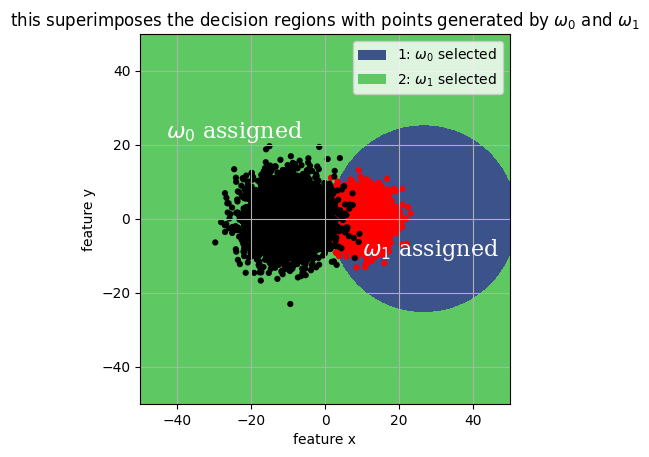

In [ ]:
import numpy as np                   # this command imports the numpy (numerical Python) library, and gives it the nickname "np"
import matplotlib.pyplot as plt      # this command imports the matplotlib plotting library, and gives it the nickname "plt"

# In this project we only focus on N=2 hypothesis, w_0 and w_1 *********************************************************
N = 2                                # number of labels, in this case, 2 individual 2D Gaussian Distributions: one for w_0 and one for w_1

# We'll set up a control, so we can choose how to set the priors for each hypothesis i**********************************
equi_probable = 1                    # if this equals 1, then we have a ML estimate with equal priors, so P(w_0)=P(w_1)=1/2
                                     # if this equals 0, then we the priors may be different
if equi_probable:
  prob = np.ones(N) *1/N             # if equi_probable=1, then all priors are uniform, P(w_i)=1/N
else:
  prob = np.random.uniform(0,1,N)    # if equi_probable=0, this generates a random prior for each label, but it must still be normalized
  prop=prob/np.sum(prob)             # this makes sure all priors add up to 1, as all pmf should
  print('The random priors are [P(w_0)  P(w_1)]='+str(prop)) # note: each time we run this code we get different priors, as they are random

# We'll set up a control, so we can choose how to set the means, mu_x,i and mu_y,i for each hypothesis i****************
dist_with_random_mean = 0            # if this equals 1, then the mean, mu, is chosen randomly (case 6 from the above list)
                                     # if it's not equal to one, then the mean is given by a specific vector, seen below (case 5 from the above list)
if dist_with_random_mean:            # this control sequence gets triggered if dist_with_random_mean=1
  mu_X_boundary = 20.                # this defines boundary for the means, as the pdf is uniform over the interval [-mu_X_boundary, mu_X_boundary)
  mu_Y_boundary = 20.                # this does the same for the y's mean
  Mu_x = np.random.uniform(-mu_X_boundary, mu_X_boundary, N) # this command uses the random library to create an length-N vector of numbers generated by uniform pdf
                                                             # the pdf is uniform over the interval [-mu_X_boundary, mu_X_boundary)
  Mu_y = np.random.uniform(-mu_Y_boundary, mu_Y_boundary, N)
else:                                # this control sequence gets triggered if dist_with_random_mean is equal to 0
                                     # The else part creates means that are on a circle for N labels
                                     # In this problem we are only interested in the means at (10, 0) and (-10, 0)
  theta = np.linspace( 0,2*np.pi, N, endpoint = False)
  Mu_x = 10 * np.cos(theta)          # this creates a 1xN vector for the means of x
  Mu_y = 10 * np.sin(theta)          # this creates a 1xN vector for the means of y

# In this section we manually select all covariance matrices according to case 4 above  ********************************
Sigma = np.empty(N, dtype ='object') # this argument just reserve N spaces for N Cov matricies
Sigma[0] = np.diag((12.5, 12.5))         # this creates a diagonal matrix with hand-picked vaues and assigns it to each Sigma matrix
Sigma[1] = np.diag((27.5, 27.5))       # this creates a diagonal matrix with hand-picked vaues and assigns it to each Sigma matrix

# We define the graph area and  number of grid points *******************************************************************
N_grid = 1000                           # these mark the number of grid poins on the horizontal and vertical axis
X_boundary = 50.                        # the graph will go horizontally from -50 to 50
Y_boundary = 50.                        # the graph will go vertically from -50 to 50
# the numpy.meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing
# It returns two 2-Dimensional arrays representing the X and Y coordinates of all the points
resolution = .1                         # here we define the distance between two consecutive points on the mesh grid
x_min, x_max = -X_boundary, X_boundary  # here we define the boundaries of the mesh grid horizontally
y_min, y_max = -Y_boundary, Y_boundary  # here we define the boundaries of the mesh grid vertically
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))  # This command creates a mesh or net of (x,y) values that go uniformly from boundary to boundary in 2D
h = 0*xx                                # This initializes our decision matrix for each (x,y) pair in the mesh to zero, and ensures it has the same dimensions as xx

# We don't want to use "for" loops. Instead, we simultaneously calculate the discriminant function for each (x,y) mesh point
# and compare them for i=0 and i=1 **************************************************************************************
max = np.ones(xx.shape)* (-1e20)        # set this to a very negative number for all (x,y) feature pairs in the mesh
for i in np.arange(N):                  # for each hypothesis, i =0, 1, we calculate the discriminant function from equation (star star) above and compare them
      discriminant = np.log(prob[i]) \
      -np.log(np.sqrt(np.linalg.det(Sigma[i]))) \
      -(np.square(xx - Mu_x[i])/(2*Sigma[i][0,0]) + np.square(yy-Mu_y[i])/(2*Sigma[i][1,1])) # This long expression comes from equation (star star) above. For each (x,y) pair
      # display(discriminant.shape)                                                    # this one command calculates g_i for all of them at once (rather than "for" loops).
      h  = h* ((discriminant<max) *1.) + ((discriminant >= max) *1.) *(i+1)            # For each (x,y) feature vector in h, if g_i < max, then keep h(x,y) as
                                                                                       # h(x,y) (note: the multiplying by "1." is to keep it float rather than logical)
                                                                                       # If g_i >=max, then replace h(x,y) with 1*(i+1)... the winning label
      max = max * ((discriminant<max)*1.) + ((discriminant >= max)*1.) *discriminant   # If the new i "wins", then replace the max threshold with the new discriminant, g_i,
                                                                                       # otherwise, keep the max threshold unchanged.

# This final segment of code is for graphing ****************************************************************************
plt.contourf(xx[0,:],yy[:,0],h[:, :])
LL = [i for i in range(N+1)]
cs = plt.contourf(xx[0,:], yy[:,0],h[:,:], LL)  # See above
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0])
    for pc in cs.collections]
legend_labels = [f"{i + 1}: $\omega_{i}$ selected" for i in range(N)] # this line jus generate an array that can be used in creating the legend
plt.legend(proxy, legend_labels)
plt.xlabel('feature x')
plt.ylabel('feature y')
if N == 2:
  plt.title('this superimposes the decision regions with points generated by $\omega_0$ and $\omega_1$')
plt.grid()

#
color = 'r' + 'k'             # Here we concatenate the two strings for red (r) and black (k)
num_instances = 10000         # Here we decide to create  ten thousand instances
for i in np.arange(N):        # For all our N samples, we create them according to the two pdf
                              # proportionally to their priors.
                              # That is to say, we deterministcally generate a proportional
                              # number of random variables, according to P(w_0) and P(w_1).
  print("the prior for hypothesis ",i,", P(w_",i,"), is ",prob[i])
  MM = int(np.round(prob[i]*10000))                             # Each hypothesis gets its proportion of instances.
  x = np.random.normal(Mu_x[i], np.sqrt(Sigma[i][0,0]), (MM))   # Each hypothesis creates its (x,y) pairs, each
  y = np.random.normal(Mu_y[i], np.sqrt(Sigma[i][1,1]), (MM))   # with a Gaussian distribution.
  features= np.vstack((x,y))                                    # Stack all x's and y's into a matrix. (optional)
  print("Number of instances for hypothesis ",i," is ",features.shape[1]) # Here we find how many points
                                                                          # were generated with each hypothesis.
  plt.scatter(               # This scatter plot shows the  position of each instance as a dot
    features[ 0, :],         # superimposed on the decision graph we made before.
    features[1 , :],
    s=20,
    linewidth=1,
    facecolors=color[i],
    edgecolors="none",
    label='for hypothesis '+str(i)
    )
  # plt.legend()

font = {'family': 'serif',
       'color':  'white',
       'weight': 'normal',
       'size': 16,
       }
if N == 2:
  plt.text(-43, 22, r'$\omega_0$ assigned', fontdict=font)
  plt.text(10, -10, r'$\omega_1$ assigned', fontdict=font)

ax = plt.gca()                 # This blotch of code forces the graph's aspect ratio to be square
ax.set_aspect('equal', adjustable='box')
plt.draw()

This code runs much faster than the previous version because we avoid "for" loops. The shape of the boundary is different because in Case 4, the covariance matricies for the two hypothesis are different, and in case 3 they were the same.

\\

### We repeat the last task, but covariance matrices are not diagonal

Here we plot samples of the feature vectors generated by the pdf on top of the area where the decision boundaries are plotted. Please convince yourself that this makes sense.

the prior for hypothesis  0 , P(w_ 0 ), is  0.5
Number of instances for hypothesis  0  is  5000
the prior for hypothesis  1 , P(w_ 1 ), is  0.5
Number of instances for hypothesis  1  is  5000


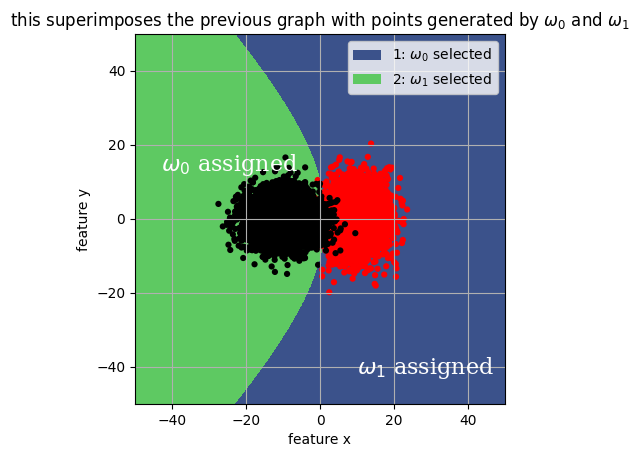

In [ ]:
# Running the previous code cells has already initialized many of our variables and imported libraries.
# As long as we run this box shortly after the previous boxes, those values carry over. If you interrupt your work for
# a long time, and then come back to it, then just run the previous code cells to re-initialize the values.
# For this box, we just need to make the changes for non-diagonal covariance matrices.

# In this section we manually select all covariance matrices according to case 4 above  ********************************
Sigma = np.empty(N, dtype ='object') # this argument just reserve N spaces for N Cov matricies
Sigma[0] = np.diag((15., 25.))         # this creates a diagonal matrix with hand-picked vaues and assigns it to each Sigma matrix
Sigma[1] = np.diag((25., 15.))         # this creates a diagonal matrix with hand-picked vaues and assigns it to each Sigma matrix

# We define the graph area and  number of grid points *******************************************************************
N_grid = 1000                           # these mark the number of grid poins on the horizontal and vertical axis
X_boundary = 50.                        # the graph will go horizontally from -50 to 50
Y_boundary = 50.                        # the graph will go vertically from -50 to 50
# the numpy.meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing
# It returns two 2-Dimensional arrays representing the X and Y coordinates of all the points
resolution = .1                         # here we define the distance between two consecutive points on the mesh grid
x_min, x_max = -X_boundary, X_boundary  # here we define the boundaries of the mesh grid horizontally
y_min, y_max = -Y_boundary, Y_boundary  # here we define the boundaries of the mesh grid vertically
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))  # This command creates a mesh or net of (x,y) values that go uniformly from boundary to boundary in 2D
h = 0*xx                                # This initializes our decision matrix for each (x,y) pair in the mesh to zero, and ensures it has the same dimensions as xx

# We don't want to use "for" loops. Instead, we simultaneously calculate the discriminant function for each (x,y) mesh point
# and compare them for i=0 and i=1 **************************************************************************************
max = np.ones(xx.shape)* (-1e20)        # set this to a very negative number for all (x,y) feature pairs in the mesh
for i in np.arange(N):                  # for each hypothesis, i =0, 1, we calculate the discriminant function from equation (star star) above and compare them
      discriminant = np.log(prob[i]) \
      -np.log(np.sqrt(np.linalg.det(Sigma[i]))) \
      -(np.square(xx - Mu_x[i])/(2*Sigma[i][0,0]) + np.square(yy-Mu_y[i])/(2*Sigma[i][1,1])) # This long expression comes from equation (star star) above. For each (x,y) pair
      # display(discriminant.shape)                                                    # this one command calculates g_i for all of them at once (rather than "for" loops).
      h  = h* ((discriminant<max) *1.) + ((discriminant >= max) *1.) *(i+1)            # For each (x,y) feature vector in h, if g_i < max, then keep h(x,y) as
                                                                                       # h(x,y) (note: the multiplying by "1." is to keep it float rather than logical)
                                                                                       # If g_i >=max, then replace h(x,y) with 1*(i+1)... the winning label
      max = max * ((discriminant<max)*1.) + ((discriminant >= max)*1.) *discriminant   # If the new i "wins", then replace the max threshold with the new discriminant, g_i,
                                                                                       # otherwise, keep the max threshold unchanged.

# This final segment of code is for graphing ****************************************************************************
plt.contourf(xx[0,:],yy[:,0],h[:, :])
LL = [i for i in range(N+1)]
cs = plt.contourf(xx[0,:], yy[:,0],h[:,:], LL)  # See above
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0])
    for pc in cs.collections]
legend_labels = [f"{i + 1}: $\omega_{i}$ selected" for i in range(N)] # this line jus generate an array that can be used in creating the legend
plt.legend(proxy, legend_labels)
plt.xlabel('feature x')
plt.ylabel('feature y')
if N == 2:
  plt.title('this superimposes the previous graph with points generated by $\omega_0$ and $\omega_1$')
plt.grid()

#
color = 'r' + 'k'             # Here we concatenate the two strings for red (r) and black (k)
num_instances = 10000         # Here we decide to create  ten thousand instances
for i in np.arange(N):        # For all our N samples, we create them according to the two pdf
                              # proportionally to their priors.
                              # That is to say, we deterministcally generate a proportional
                              # number of random variables, according to P(w_0) and P(w_1).
  print("the prior for hypothesis ",i,", P(w_",i,"), is ",prob[i])
  MM = int(np.round(prob[i]*10000))                    # Each hypothesis gets its proportion of instances.
  x = np.random.normal(Mu_x[i], np.sqrt(Sigma[i][0,0]), (MM))   # Each hypothesis creates its (x,y) pairs, each
  y = np.random.normal(Mu_y[i], np.sqrt(Sigma[i][1,1]), (MM))   # with a Gaussian distribution.
  features= np.vstack((x,y))                           # Stack all x's and y's into a matrix. (optional)
  print("Number of instances for hypothesis ",i," is ",features.shape[1]) # Here we find how many points
                                                                          # were generated with each hypothesis.
  plt.scatter(               # This scatter plot shows the  position of each instance as a dot
    features[ 0, :],         # superimposed on the decision graph we made before.
    features[1 , :],
    s=20,
    linewidth=1,
    facecolors=color[i],
    edgecolors="none",
    label='for hypothesis '+str(i)
    )
  # plt.legend()

font = {'family': 'serif',
       'color':  'white',
       'weight': 'normal',
       'size': 16,
       }
if N == 2:
  plt.text(-43, 13, r'$\omega_0$ assigned', fontdict=font)
  plt.text(10, -42, r'$\omega_1$ assigned', fontdict=font)

ax = plt.gca()                            # This blotch of code forces the graph's aspect ratio to be square
ax.set_aspect('equal', adjustable='box')
plt.draw()

Every red dot that falls in the green region will be mislabeled as having been generated by the $\omega_0$ Gaussian. This will be counted as an error of our classifier. Similarly, every black dot that falls in the blue region will be mislabeled as having been generated by the $\omega_1$ Gaussian.

***
***
# Your tasks for this project
## Your code must be added below this box.

### (Problem 1) [2 points]
Without changing the parameters of the above program, estimate the probability of error (the proportion of mislabeled ones with respect to the total number). In other words, given the following parameters, calculate the error rate:



*    $ \mu_0 =
  \begin{bmatrix} -10 \\10
  \end{bmatrix}
$  and $ \mu_1 =
  \begin{bmatrix} 10 \\-10
  \end{bmatrix}
$

* $
\Sigma_0 =  \Sigma_1  = \begin{bmatrix}
    60 & 0  \\
    0 & 60
 \end{bmatrix}
$


*   $P(\omega_0)= P(\omega_1) =1/2$.


The decision boundary is set by the formulas that are given in the body of this problem and discussed in the class.

Remember: An error happens when a feature vector of label $\omega_i$ falls in the decision space for $\omega_j$, and $i \ne j$. Furthermore, the measured error rate is given by:

$$
Prob(error) = Prob(error,\omega_0)~~~~~~~~~+~~~~~Prob(error,\omega_1)\\
~~~~~~~~~~~~~~~~~~~~~~~~~~   
            =Prob(error|\omega_0)\cdot P(\omega_0)+Prob(error|\omega_1)\cdot P(\omega_1)\\
\approx \frac{|false~positives|}{total~number~of~\omega_0~feature~vectors}\cdot P(\omega_0)+\frac{|false~negatives|}{total~number~of~\omega_1~feature~vectors}\cdot P(\omega_1)
$$

where $|false~positives|=$ number of feature vectors that were generated with $\omega_0$'s pdf, but fell in the decision space for $\omega_1$, and
$|false~negatives|=$ number of feature vectors that were generated with $\omega_1$'s pdf, but fell in the decision space for $\omega_0$. In other words, the numerator has the count of mistakes the estimator makes, and the denominator has the total number of feature vectors.

## Hint

You can use the program similar to the one that plots the sample points to count the number of points that fall in the proper region and the ones that fall in the wrong region, and then use the proportion to calculate the probability of error.

### (Problem 2) [3 points]

Estimate the probability of error for the following cases

*   Change the mean $ \mu_0 =
  \begin{bmatrix} -15 \\0
  \end{bmatrix}
$  and $ \mu_1 =
  \begin{bmatrix} 15 \\0
  \end{bmatrix}
$
*   Change the $\Sigma_i$ to variances to $$
\Sigma_0 =  \begin{bmatrix}
    6^2 & 0  \\
    0 & 6^2
 \end{bmatrix}
$$
and

$$
 \Sigma_1 =  \begin{bmatrix}
    6.8^2 & 0  \\
    0 & 6.8^2
 \end{bmatrix}
$$


*   Change $P(\omega_0) = 0.85$ and $P(\omega_1) = 0.15$.




In [ ]:
total_num_instances = 10000
each_h_num_instances = np.empty(N, dtype="int")        # Here we decide to create  ten thousand instances
error = np.empty(N, dtype="float")
# set a control
problem = 1
if problem:   # when problem equals to 1, then the parameters are set for Problem 1, otherwise they are set for Problem 2
  Mu_x = [-10, 10]
  Mu_y = [10, -10]
  Sigma = np.empty(N, dtype ='object') # this argument just reserve N spaces for N Cov matricies
  Sigma[0] = np.diag((60, 60))         # this creates a diagonal matrix with hand-picked vaues and assigns it to each Sigma matrix
  Sigma[1] = np.diag((60, 60))
  prob = [0.5, 0.5]
else:  # Problem 2 parameters
  Mu_x = [-15, 15]
  Mu_y = [0, 0]
  Sigma = np.empty(N, dtype ='object') # this argument just reserve N spaces for N Cov matricies
  Sigma[0] = np.diag((6**2, 6**2))         # this creates a diagonal matrix with hand-picked vaues and assigns it to each Sigma matrix
  Sigma[1] = np.diag((6.8**2, 6.8**2))
  prob = [0.85, 0.15]

In [ ]:
# problem 1
for i in np.arange(N):        # For all our N samples, we create them according to the two pdf
                              # proportionally to their priors.
                              # That is to say, we deterministcally generate a proportional
                              # number of random variables, according to P(w_0) and P(w_1).
  print("the prior for hypothesis ",i,", P(w_",i,"), is ",prob[i])
  each_h_num_instances[i] = int(np.round(prob[i]*total_num_instances))
  print(f"number of instances for hypothesis {i} is {each_h_num_instances[i]}")                             # Each hypothesis gets its proportion of instances.
  x = np.random.normal(Mu_x[i], np.sqrt(Sigma[i][0,0]), (each_h_num_instances[i]))   # Each hypothesis creates its (x,y) pairs, each
  y = np.random.normal(Mu_y[i], np.sqrt(Sigma[i][1,1]), (each_h_num_instances[i]))   # with a Gaussian distribution.

  correct = np.log(prob[i]) \
      -np.log(np.sqrt(np.linalg.det(Sigma[i]))) \
      -(np.square(x - Mu_x[i])/(2*Sigma[i][0,0]) + np.square(y-Mu_y[i])/(2*Sigma[i][1,1]))      # star star above
  j = (i+1)%N     # set to the oppisite hyperthisis in order to compare the probability
  incorrect = np.log(prob[j]) \
      -np.log(np.sqrt(np.linalg.det(Sigma[j]))) \
      -(np.square(x - Mu_x[j])/(2*Sigma[j][0,0]) + np.square(y-Mu_y[j])/(2*Sigma[j][1,1]))

  error[i] = np.sum(incorrect > correct) / each_h_num_instances[i]
final_error = (error[0]*(0.5)) + (error[1]*(0.5))
print(f"error: {final_error}")

the prior for hypothesis  0 , P(w_ 0 ), is  0.5
number of instances for hypothesis 0 is 5000
the prior for hypothesis  1 , P(w_ 1 ), is  0.5
number of instances for hypothesis 1 is 5000
error: 0.0347


In [ ]:
# Problem 2
problem = 0
if problem:   # problem equals to 1, then the parameters are set for Problem 1, otherwise it's set for Problem 2
  Mu_x = [-10, 10]
  Mu_y = [10, -10]
  Sigma = np.empty(N, dtype ='object') # this argument just reserve N spaces for N Cov matricies
  Sigma[0] = np.diag((60, 60))         # this creates a diagonal matrix with hand-picked vaues and assigns it to each Sigma matrix
  Sigma[1] = np.diag((60, 60))
  prob = [0.5, 0.5]
else:  # Problem 2 parameters
  Mu_x = [-15, 15]
  Mu_y = [0, 0]
  Sigma = np.empty(N, dtype ='object') # this argument just reserve N spaces for N Cov matricies
  Sigma[0] = np.diag((6**2, 6**2))         # this creates a diagonal matrix with hand-picked vaues and assigns it to each Sigma matrix
  Sigma[1] = np.diag((6.8**2, 6.8**2))
  prob = [0.85, 0.15]
for i in np.arange(N):        # For all our N samples, we create them according to the two pdf
                              # proportionally to their priors.
                              # That is to say, we deterministcally generate a proportional
                              # number of random variables, according to P(w_0) and P(w_1).
  print("the prior for hypothesis ",i,", P(w_",i,"), is ",prob[i])
  each_h_num_instances[i] = int(np.round(prob[i]*total_num_instances))
  print(f"number of instances for hypothesis {i} is {each_h_num_instances[i]}")                             # Each hypothesis gets its proportion of instances.
  x = np.random.normal(Mu_x[i], np.sqrt(Sigma[i][0,0]), (each_h_num_instances[i]))   # Each hypothesis creates its (x,y) pairs, each
  y = np.random.normal(Mu_y[i], np.sqrt(Sigma[i][1,1]), (each_h_num_instances[i]))   # with a Gaussian distribution.

  correct = np.log(prob[i]) \
      -np.log(np.sqrt(np.linalg.det(Sigma[i]))) \
      -(np.square(x - Mu_x[i])/(2*Sigma[i][0,0]) + np.square(y-Mu_y[i])/(2*Sigma[i][1,1]))
  j = (i+1)%N
  incorrect = np.log(prob[j]) \
      -np.log(np.sqrt(np.linalg.det(Sigma[j]))) \
      -(np.square(x - Mu_x[j])/(2*Sigma[j][0,0]) + np.square(y-Mu_y[j])/(2*Sigma[j][1,1]))

  error[i] = np.sum(incorrect > correct) / each_h_num_instances[i]
final_error = (error[0]*(0.85)) + (error[1]*(0.15))
print(f"error: {final_error}")

the prior for hypothesis  0 , P(w_ 0 ), is  0.85
number of instances for hypothesis 0 is 8500
the prior for hypothesis  1 , P(w_ 1 ), is  0.15
number of instances for hypothesis 1 is 1500
error: 0.0071
